In [1]:
from tensorflow import keras
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
best_model = keras.models.load_model("best_model")
input_size= (30, 30)

In [3]:
Image_directory = "Images/"
images = []
images_display = []
for image in os.listdir(Image_directory):
    images.append(np.array(keras.preprocessing.image.load_img(Image_directory + image, color_mode = 'rgb', 
                                                              interpolation = 'lanczos',
                                                              target_size = (30, 30)))/255)
    images_display.append(np.array(keras.preprocessing.image.load_img(Image_directory + image, color_mode = 'rgb', 
                                                              interpolation = 'lanczos'))/255)
batch = np.array(images)

In [4]:
output = best_model.predict(batch)
out = [(keras.backend.argmax(output[i])).numpy() for i in range(len(output))]

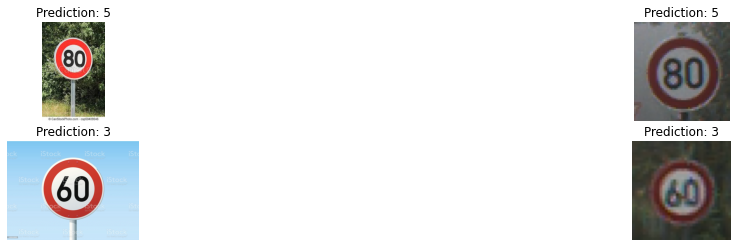

In [5]:
rows,cols = ((len(images_display) - 1) // 2 ) + 1, 2
temp_axis = rows * 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,temp_axis))
for i in range(len(images_display)):
    temp = 'Prediction: ' + str(out[i])
    axes[i//cols, i%cols].set_title(temp)
    axes[i//cols, i%cols].axis('off')
    axes[i//cols, i%cols].imshow(images_display[i])